In [1]:
!pip install causal-learn

Defaulting to user installation because normal site-packages is not writeable


[Data: social-media-engagement-report](https://www.kaggle.com/datasets/aliredaelblgihy/social-media-engagement-report)

Preprocessing summary:
- Platform: LinkedIn = 1, Instagram = 2, Twitter = 3, LinkedIn = 4 
- Post Type: Video = 1, Image = 2, Link = 3
- reduced dataset to 1000 elements
- reduced columns as (e.g. user ids or platform are not used)
- converted from string to numbers

In [14]:
import pandas as pd
import os
path = os.getcwd()
file_path = path + '\\social_media_engagement_data.csv'
df = pd.read_csv(file_path, header=0)
df.head()

Post Type  Likes  Comments  Shares  Impressions  Reach
0          1    415        77      85         2619   1842
1          1    908       125      85         1223   3884
2          1    412       419      58         2165    849
3          2    667       153      29         7191   3519
4          3    659       215      34         3312   2032

Depth=3, working on node 5: 100%|██████████| 6/6 [00:00<00:00, 390.39it/s]


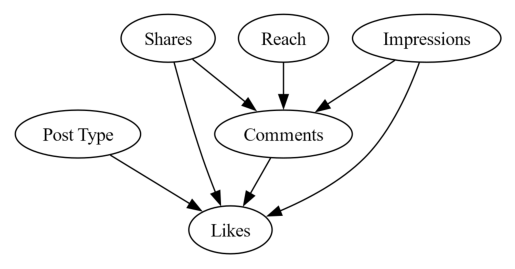

In [18]:
# AUTOMATICALLY ESTIMATED GRAPH FROM DATA!
from causallearn.search.ConstraintBased.PC import pc
labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df.to_numpy()

cg = pc(data, alpha=0.45)
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()